# Sujet de programmation (P-PIC)

### Introduction :

Article de mr. Turinici: https://arxiv.org/pdf/2005.00049.pdf

On suppose qu'une maladie infectieuse (Covid-19) touche une population d'individus de taille N.

Nous nous plaçons dans le modèle SEIR avec 4 classes d'individus principales :

- $s := S/N$ proportion d'individus "Suceptible",

- $e := E/N$ proportion d'individus "Exposed",

- $i := I/N$ proportion d'individus "Infected",

- $r := R/N$ proportion d'individus "Recovered".
<br/>

Nous supposons dans notre modèle que les classes $e$, $i$ et $r$ sont homogènes mais que le confinement a provoqué une partition de $S$ en K clusters. 

<br/>

D'après la formule (53) de l'article, la dynamique du système selon SEIR est ainsi la suivante :

$\forall k \in \{1,\dots,K\} : $

$$\frac{ds_{k}}{dt}=-\beta_{k}s_{k}i \ \ ;\ \  \frac{de}{dt}=\left(\sum_{k=1}^{K}\beta_{k}s_{k}\right)i-\alpha e \ \ ;\ \ \frac{di}{dt}=\alpha e -\gamma i\ \ ; \ \ \frac{dr}{dt}=\gamma i$$

<br/>

Les paramètres s'intérprètent de la façon suivante :

- $\frac{1}{\alpha}$ : la période d'incubation moyenne.

- $\gamma$ : le taux de transmission.

- $\beta_{k}$ : le produit entre le nombre moyen de contacts par personnes dans $S_{k}$ et par unité de temps et la probabilité de transmission entre une personne dans $S_{k}$ et une personne infectée.

<br/>

Pour l'ensemble des applications numériques nous prendrons comme valeur pour les constantes :

- $s(0):=0.99984$

- $s_{k}(0):=p_{k} s(0)$

- $e(0):=8.81\times10^{-5}$

- $i(0):=1.88\times10^{-5}$

- $r(0):=5.35.10^{-5}$

- $\alpha:=0.25$

- $\gamma:=1$

- $\beta:=\sum_{k=1}^{K}p_k \beta_{k}=2.33$

Comme proposé par les items (61) et (62) de l'article.

In [1]:
%pylab inline

from scipy.integrate import odeint

Populating the interactive namespace from numpy and matplotlib


## 1. Le cas $K=1$

On considère le cas sans confinement, i.e. la classe $S$ est homogène. Le système se réecrit selon les équation (6)-(9) de l'article c'est-à-dire :

$$\frac{ds}{dt}=-\beta s i \ \ ; \ \ \frac{de}{dt}=\beta s i-\alpha e \ \ ; \ \ \frac{di}{dt}=\alpha e -\gamma i \ \ ; \ \ \frac{dr}{dt}=\gamma i$$ 

<br/>


### Schéma numérique du système

On propose 2 méthodes de simulation Euler explicite et la fonction odeint de Python pour vérifiaction.

Nous proposons d'abord l'implémentation de :

$$\frac{d(s,e,i,r)}{dt}$$.

In [0]:
def dseir(X,t,beta=2.33,alpha=0.25,gamma=1.0): #X=(s,e,i,r)
    
    s,e,i,r=X
    ds=-beta*s*i
    de=beta*s*i-alpha*e
    di=alpha*e-gamma*i
    dr=gamma*i
    
    return(array([ds,de,di,dr]))

<br/>

Nous rappelons le schéma d'Euler explicite :

$$(s,e,i,r)_{n+1}:=(s,e,i,r)_{n}+h\frac{d(s,e,i,r)}{dt}((s,e,i,r)_{n})$$

qui découle en fait du DL suivant $f(t+h)=f(t)+hf'(t)+\epsilon(h)$ pour h petit.

<br/>

Nous prendrons ici un pas de l'ordre de $\frac{T}{n}$ avec $T$ l'horizon de temps et $n$ le nombre de points souhaité dans $[0,T]$.

<br/>



In [0]:
##Implémentation de EE:

X0=array([0.99984,8.81*10**(-5),1.88*10**(-5),5.35*10**(-5)]) #X0=(s0,e0,i0,r0)

def EE(n=100,T=1,df=dseir,X0=X0,beta=2.33,alpha=0.25,gamma=1.0):  #df:=d(s,e,i,r)
    
    #Initialisation
    h=T/n
    OUTPUT=[]
    OUTPUT.append(X0)
    
    #Boucle principale
    for i in range(n):
        
        Xn=OUTPUT[i] 
        OUTPUT.append(Xn+h*df(Xn,n,beta,alpha,gamma)) #Xn+1
        
    return(array(OUTPUT))

In [4]:
#Test

EE(2,2)

array([[9.99840000e-01, 8.81000000e-05, 1.88000000e-05, 5.35000000e-05],
       [9.99796203e-01, 1.09871991e-04, 2.20250000e-05, 7.23000000e-05],
       [9.99744895e-01, 1.33711785e-04, 2.74679978e-05, 9.43250000e-05]])

In [5]:
odeint(dseir,X0,range(3),args=(2.33,0.25,1.0))

array([[9.99840000e-01, 8.81000000e-05, 1.88000000e-05, 5.35000000e-05],
       [9.99791703e-01, 1.11520544e-04, 2.29444401e-05, 7.42322430e-05],
       [9.99731896e-01, 1.39996278e-04, 2.86009678e-05, 9.99063417e-05]])

<br/>

On aimerait que $t$ représente une journée; en d'autres termes que $h=1$ constant; i.e. $T=n$.

On va tester le modèle pour différents nombres de jours: 30, 90, 180 et 365 pour des horizons de temps correspondant de l'ordre du mois, du trimestre, du semestre et de l'année.

<br/>


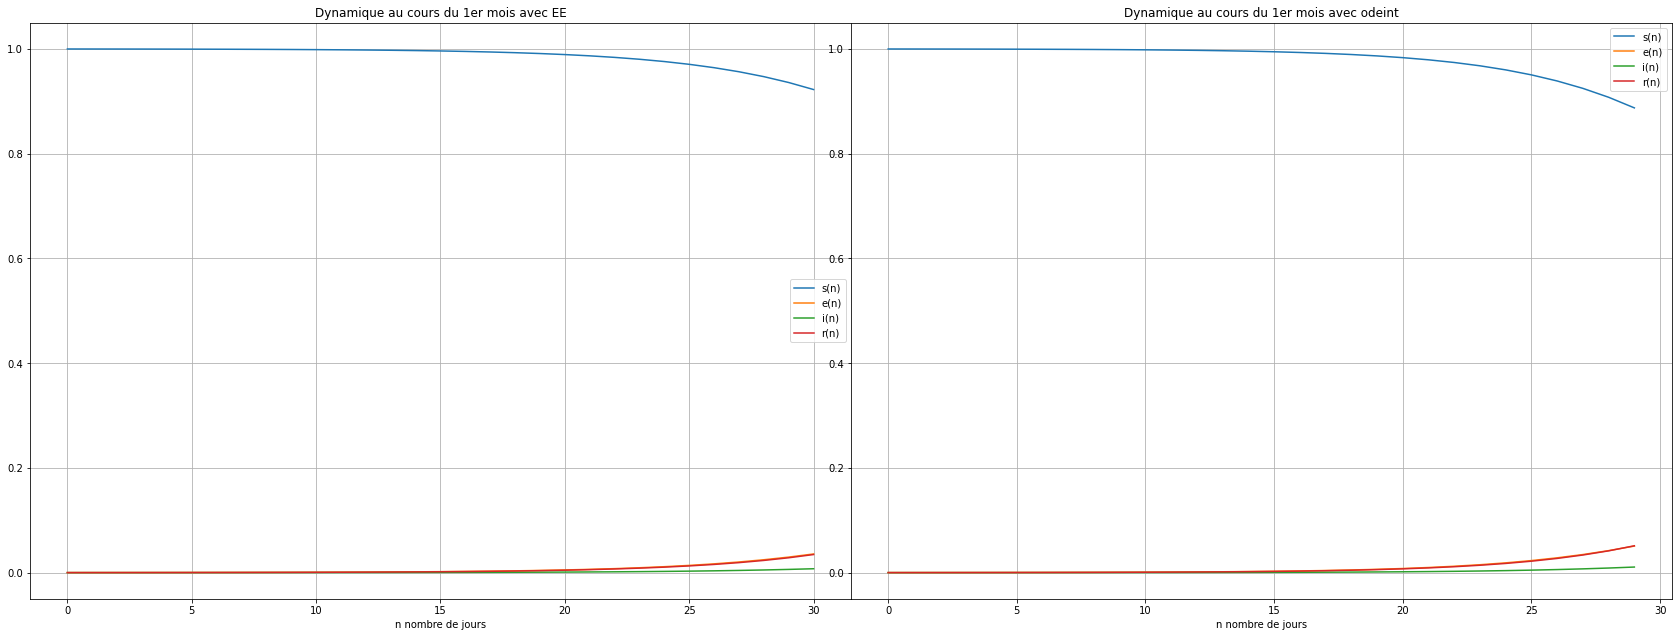

In [6]:
#n=30
figure()
pyplot.gcf().subplots_adjust(left = 0.2, bottom = 1, right = 4, top = 3, wspace = 0, hspace = 0)

subplot(1,2,1)
plot(range(31),EE(30,30))
legend(['s(n)','e(n)','i(n)','r(n)'])
title('Dynamique au cours du 1er mois avec EE')
xlabel('n nombre de jours')
grid(True)

subplot(1,2,2)
plot(range(30),odeint(dseir,X0,range(30),args=(2.33,0.25,1.0)))
legend(['s(n)','e(n)','i(n)','r(n)'])
title('Dynamique au cours du 1er mois avec odeint')
xlabel('n nombre de jours')
grid(True)

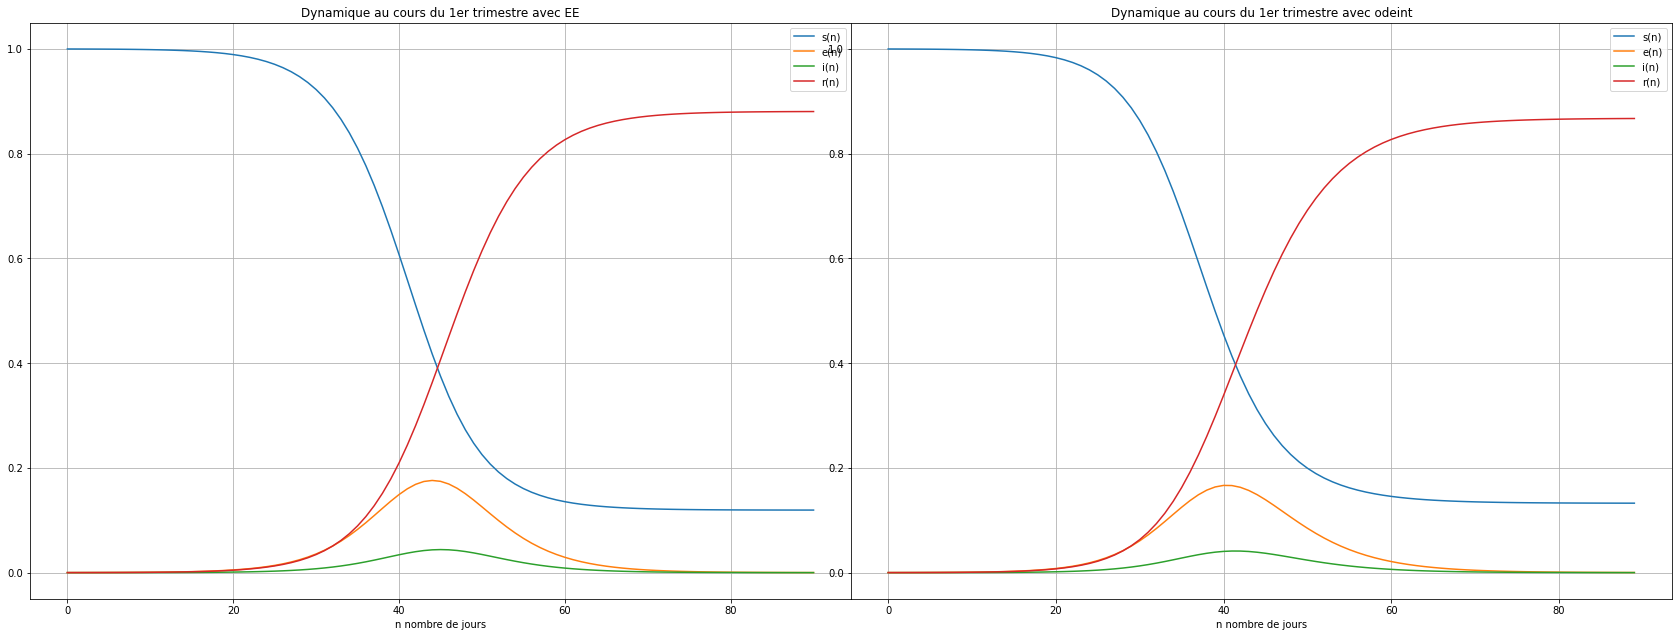

In [7]:
#n=90
figure()
pyplot.gcf().subplots_adjust(left = 0.2, bottom = 1, right = 4, top = 3, wspace = 0, hspace = 0)

subplot(1,2,1)
plot(range(91),EE(90,90))
legend(['s(n)','e(n)','i(n)','r(n)'])
title('Dynamique au cours du 1er trimestre avec EE')
xlabel('n nombre de jours')
grid(True)

subplot(1,2,2)
plot(range(90),odeint(dseir,X0,range(90),args=(2.33,0.25,1.0)))
legend(['s(n)','e(n)','i(n)','r(n)'])
title('Dynamique au cours du 1er trimestre avec odeint')
xlabel('n nombre de jours')
grid(True)

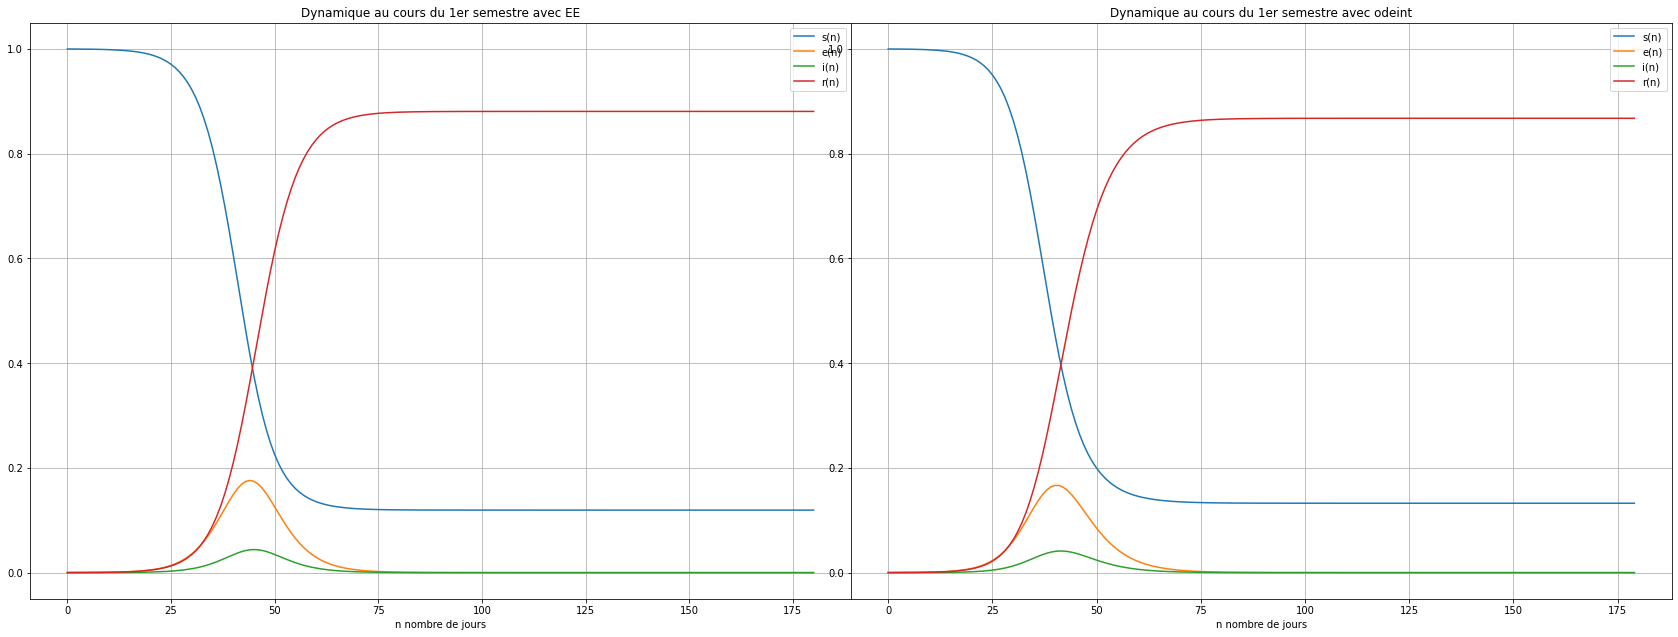

In [8]:
#n=180
figure()
pyplot.gcf().subplots_adjust(left = 0.2, bottom = 1, right = 4, top = 3, wspace = 0, hspace = 0)

subplot(1,2,1)
plot(range(181),EE(180,180))
legend(['s(n)','e(n)','i(n)','r(n)'])
title('Dynamique au cours du 1er semestre avec EE')
xlabel('n nombre de jours')
grid(True)

subplot(1,2,2)
plot(range(180),odeint(dseir,X0,range(180),args=(2.33,0.25,1.0)))
legend(['s(n)','e(n)','i(n)','r(n)'])
title('Dynamique au cours du 1er semestre avec odeint')
xlabel('n nombre de jours')
grid(True)

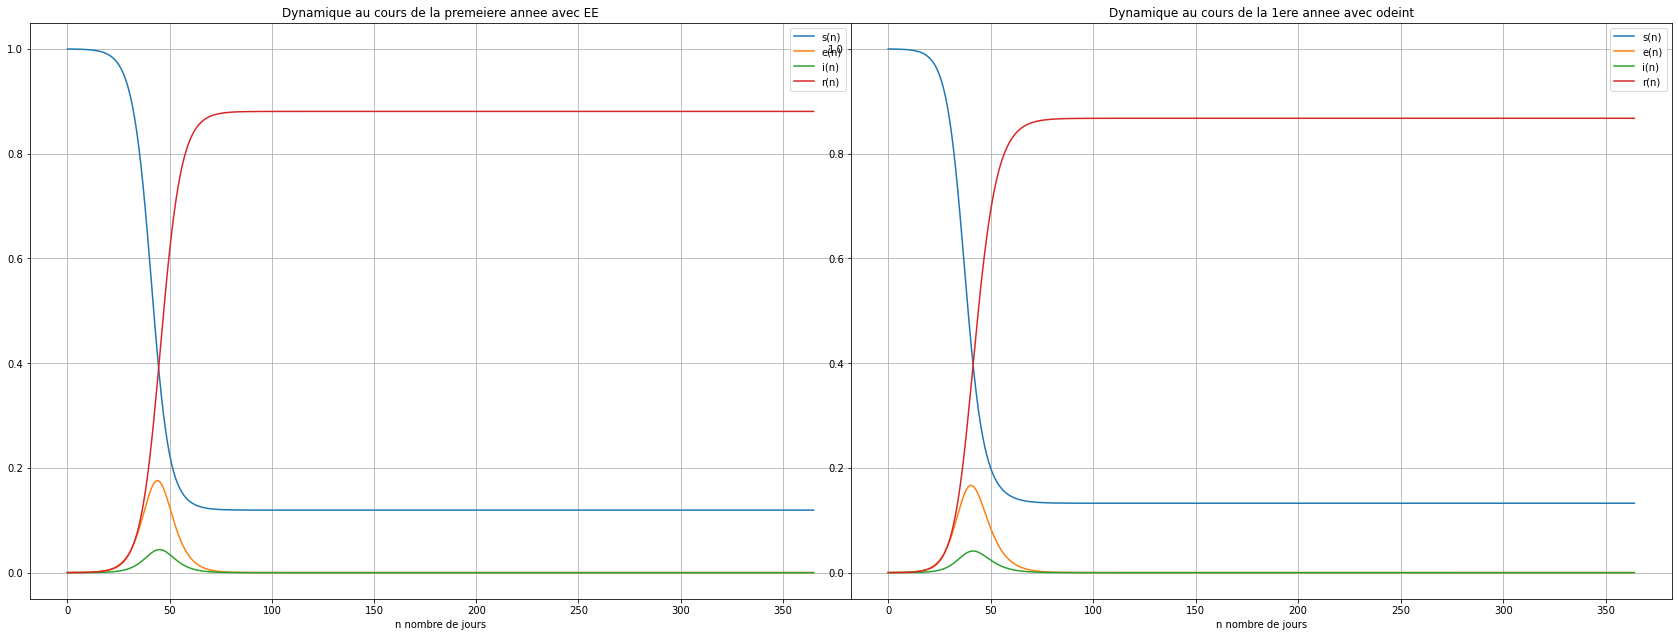

In [9]:
#n=365
figure()
pyplot.gcf().subplots_adjust(left = 0.2, bottom = 1, right = 4, top = 3, wspace = 0, hspace = 0)

subplot(1,2,1)
plot(range(366),EE(365,365))
legend(['s(n)','e(n)','i(n)','r(n)'])
title('Dynamique au cours de la premeiere annee avec EE')
xlabel('n nombre de jours')
grid(True)

subplot(1,2,2)
plot(range(365),odeint(dseir,X0,range(365),args=(2.33,0.25,1.0)))
legend(['s(n)','e(n)','i(n)','r(n)'])
title('Dynamique au cours de la 1ere annee avec odeint')
xlabel('n nombre de jours')
grid(True)

<br/>

Nous pouvons conclure déjà sur la qualité d'Euler explicite pour simuler SEIR (avec ce choix de paramètres). La dynamique globale (l'allure des courbes) est la même pour les fonctions EE et odeint. Il n'y a pas l'air d'y avoir de grande différence entre la vraie solution (odeint) et notre schéma numérique!

De manière plus générale, la plus grosse des variations dans les fonctions $s$,$e$, $i$ et $r$ se fait au cours des 3 premiers mois. Le 1er mois est relativement calme (avec $s$ diminuant lentement) alors qu'au bout de 3 mois la pandémie a l'air d'être terminée... (i.e. les points d'équilibre sont atteints) : 90 jours semble être le bon horizon de temps.

<br/>


### Calcul de $\zeta:=R(\infty)$

Nous nous intéressons d'abord au calcul de la limite de $r$ (proportion d'individus malades au sein de la population) quand $T\sim\infty$. On a $\lim R=N*\lim r$, mais le calcul de $r$ est plus parlant.

Pour cela, nous allons regarder la dynamique de $r$ avec plusieurs horizons de temps, $T\in\{30,90,180,360\}$ et regarder le point terminal $r(T)$.

<br/>


In [10]:
#T=30
print('La proportion de personnes guéries au bout de 30 jours:',EE(30,30)[30,3])
#T=90
print('La proportion de personnes guéries au bout de 90 jours:',EE(90,90)[90,3])
#T=180
print('La proportion de personnes guéries au bout de 180 jours:',EE(180,180)[180,3])
#T=360
print('La proportion de personnes guéries au bout de 365 jours:',EE(365,365)[365,3])

La proportion de personnes guéries au bout de 30 jours: 0.034515301661290174
La proportion de personnes guéries au bout de 90 jours: 0.8803942113713056
La proportion de personnes guéries au bout de 180 jours: 0.8806331734410358
La proportion de personnes guéries au bout de 365 jours: 0.8806331734590882


Illustrons cette convergence:

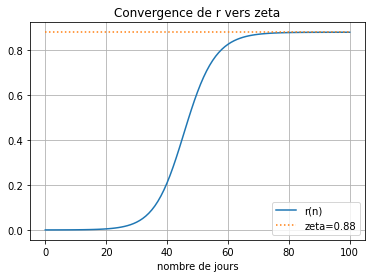

In [11]:
figure()
plot(range(101),EE(100,100)[:,3])
plot(range(101),[0.88 for k in range(101)],linestyle=':')
legend(['r(n)','zeta=0.88'])
title('Convergence de r vers zeta')
xlabel('nombre de jours')
grid(True)

### Calculs de $\pi$ (le pic) et $t_{p}$ (le jour du pic)

Dans cette partie, on cherche numériquement la valeur de $max_{t\ge0}\{e(t)+i(t)\}$

Pour cela, on peut simuler sur un grand horizon de temps : 
- calculer des $e(n)+i(n),\forall n \in \{1,\dots,T\}$ avec $n$ étant l'index de la journée 

- et prendre le max des valeurs.

<br/>


In [0]:
seir=EE(90,90) #On prend notre horizon de temps de 90 jours

In [13]:
#Calcul du max et de l'argmax

print("la prportion max d'individus inféctés/exposés est:",max(seir[:,1]+seir[:,2]),', proportion atteinte au jour:',argmax(seir[:,1]+seir[:,2]))

la prportion max d'individus inféctés/exposés est: 0.21951490806609408 , proportion atteinte au jour: 44


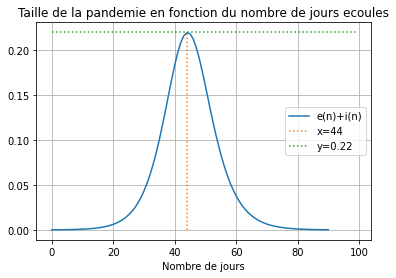

In [14]:
figure()
plot(range(len(seir)),seir[:,1]+seir[:,2]) #on affiche e(n)+i(n)
plot([44 for k in range(5)],linspace(0,0.22,5),linestyle=':')
plot(range(100),[0.22 for k in range(100)],linestyle=':')
legend(['e(n)+i(n)','x=44','y=0.22'])
xlabel('Nombre de jours')
title('Taille de la pandemie en fonction du nombre de jours ecoules')
grid(True)

Le pic de l'épidémie est atteint au 44ème jour pour une proportion totale d'indvidus infectés ou exposés de 22%. En d'autres termes :

- $\pi=0.22$

- $t_{p}= 44$

Ces résultats sont plutôt proches de la réalité.

<br/>

### Représentation graphique de l'épidémie

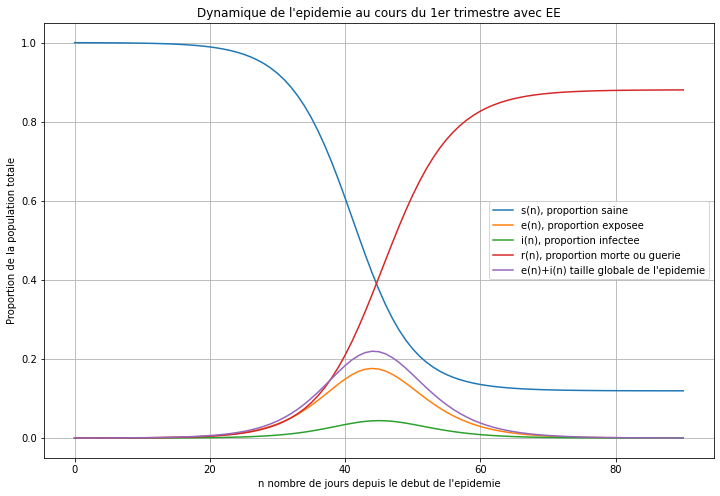

In [16]:
figure()
figsize(20,8)

plot(range(91),seir)
plot(range(91),seir[:,1]+seir[:,2])
legend(['s(n), proportion saine','e(n), proportion exposee','i(n), proportion infectee','r(n), proportion morte ou guerie',"e(n)+i(n) taille globale de l'epidemie"])
title("Dynamique de l'epidemie au cours du 1er trimestre avec EE")
xlabel("n nombre de jours depuis le debut de l'epidemie")
ylabel("Proportion de la population totale")
grid(True)

## 2. Cas du confinement $K \ge 1$

On va d'abord implémenter le nouveau système d'EDO dans le cas $K \ge 1$.

$\beta$ et s sont maintenant des vecteurs.

In [0]:
######################
##d(s1,...,sK,e,i,r)##
######################

#K nombre de clusters
#X=(s,e,i,r); s=(s1,...,sK)
#t unite de temps argument non utilise
#beta: vecteur des beta_{k}
#alpha, gamma hyperparametres comme definis avant

def dseir_K(X,t,K=1,beta=array([2.33]),alpha=0.25,gamma=1.0): 
    
    s=array(X[0:K])
    e=X[K]
    i=X[K+1]
    r=X[K+2]
    
    ds=-i*(beta*s) #* produit terme à terme
    de=i*dot(beta,s)-alpha*e #@ produit matriciel
    di=alpha*e-gamma*i
    dr=gamma*i
    
    deir=array([de,di,dr])
    
    return(hstack((ds,deir)))

#Retourne un objet de dim K+2
#les dsk sont indexes sur 0,...,K-1

In [19]:
#test
print(dseir_K(X0,0))

print(dseir(X0,0))

#OK

[-4.37969914e-05  2.17719914e-05  3.22500000e-06  1.88000000e-05]
[-4.37969914e-05  2.17719914e-05  3.22500000e-06  1.88000000e-05]


In [0]:
###############################
##EE pour integrer le systeme##
###############################
X0=array([0.99984,8.81*10**(-5),1.88*10**(-5),5.35*10**(-5)])

def EE_K(n=100,T=1,df=dseir_K,X0=X0,beta=array([2.33]),alpha=0.25,gamma=1.0):  #df:=d(s,e,i,r)
    
    #Initialisation
    K=len(X0)-3
    h=T/n
    OUTPUT=[]
    OUTPUT.append(X0)
    
    #Boucle principale
    for i in range(n):
        
        Xn=OUTPUT[i] 
        OUTPUT.append(Xn+h*df(Xn,i,K,beta,alpha,gamma)) #Xn+1
        
    return(array(OUTPUT))

In [21]:
#Test 

print(EE(2,2))
print('----------------------------------------------')
print(EE_K(2,2))

#ok??

[[9.99840000e-01 8.81000000e-05 1.88000000e-05 5.35000000e-05]
 [9.99796203e-01 1.09871991e-04 2.20250000e-05 7.23000000e-05]
 [9.99744895e-01 1.33711785e-04 2.74679978e-05 9.43250000e-05]]
----------------------------------------------
[[9.99840000e-01 8.81000000e-05 1.88000000e-05 5.35000000e-05]
 [9.99796203e-01 1.09871991e-04 2.20250000e-05 7.23000000e-05]
 [9.99744895e-01 1.33711785e-04 2.74679978e-05 9.43250000e-05]]


### Tests K=1

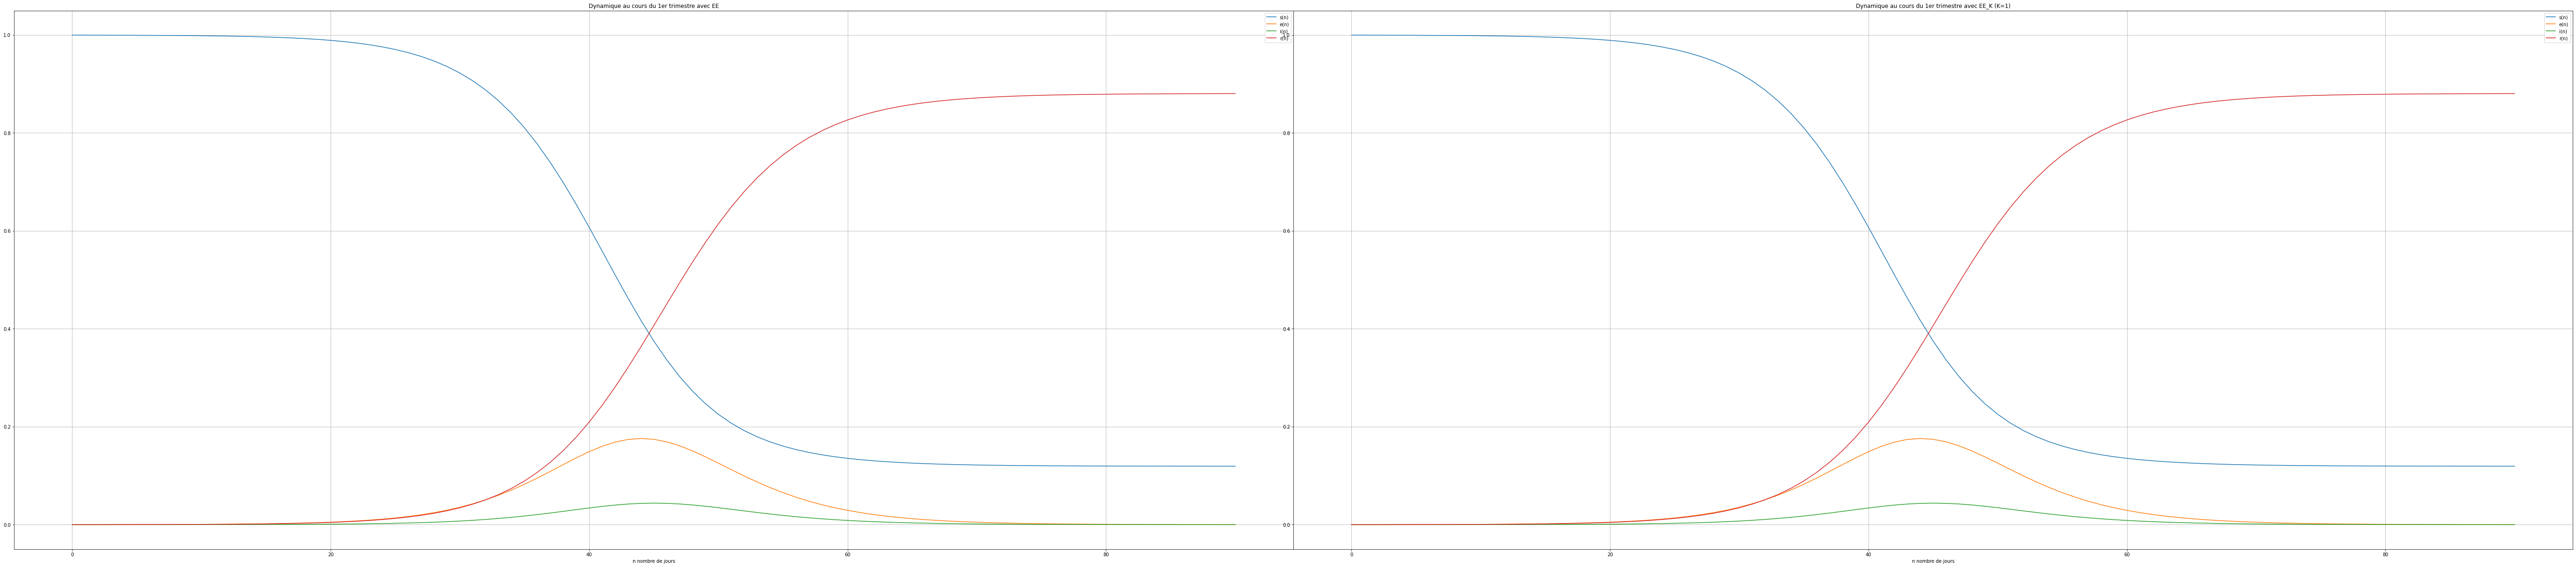

In [22]:
#test cas K=1

#n=90
figure()
pyplot.gcf().subplots_adjust(left = 0.2, bottom = 1, right = 4, top = 3, wspace = 0, hspace = 0)

subplot(1,2,1)
plot(range(91),EE(90,90))
legend(['s(n)','e(n)','i(n)','r(n)'])
title('Dynamique au cours du 1er trimestre avec EE')
xlabel('n nombre de jours')
grid(True)

subplot(1,2,2)
plot(range(91),EE_K(90,90))
legend(['s(n)','e(n)','i(n)','r(n)'])
title('Dynamique au cours du 1er trimestre avec EE_K (K=1)')
xlabel('n nombre de jours')
grid(True)



Ainsi, la méthode définie pour EE_K avec $K=1$ fait bien la même chose que EE

Simulons le système pour $K=2$, avec autant d'individus dans les 2 clusters $s_{1}(0)=s_{2}(0)=s(0)/2$ et $\beta_{1}=\beta_{2}=\beta$

Il s'agit du test de la méthode pour $K>1$.

[4.9992e-01 4.9992e-01 8.8100e-05 1.8800e-05 5.3500e-05]


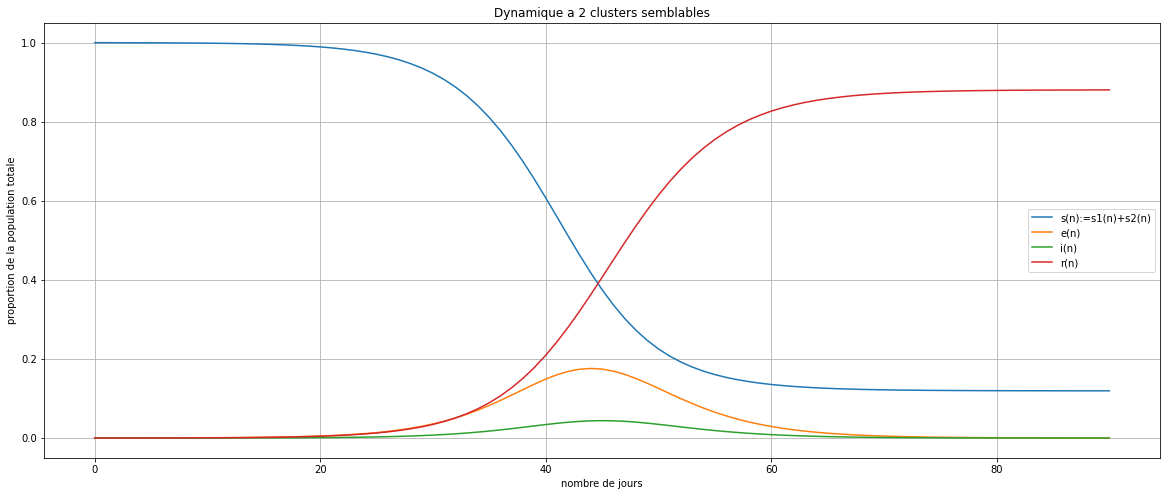

In [23]:
############
##Test K=2##
############

X0=hstack((0.99984*array([1/2,1/2]),array([8.81*10**(-5),1.88*10**(-5),5.35*10**(-5)])))
print(X0)

s2eir=EE_K(n=90,T=90,X0=X0,beta=2.33*array([1,1]))

figure()
plot(range(91),s2eir[:,0]+s2eir[:,1])
plot(range(91),s2eir[:,[2,3,4]])
legend(['s(n):=s1(n)+s2(n)','e(n)','i(n)','r(n)'])
xlabel('nombre de jours')
ylabel('proportion de la population totale')
title('Dynamique a 2 clusters semblables')
grid(True)

Dans ce cas, on retrouve bien la même dynamique qu'avec un seul cluster.


### Conjectures pour $K=2$

Nous allons regarder la dynamique de l'épidémie pour $K=2$; avec $p_{1}=p_{2}=1/2$ (i.e. des proportions égales dans chaque classe avec des taux d'expostition différents) et  $\beta_{1}=p_1\beta$, $\beta_{2}=p_2\beta$. Puis nous allons comparer avec les résultats trouvés pour $p_{1}=1/4$, $p_{2}=3/4$ et $p_{1}=99/100$, $p_{2}=1/100$

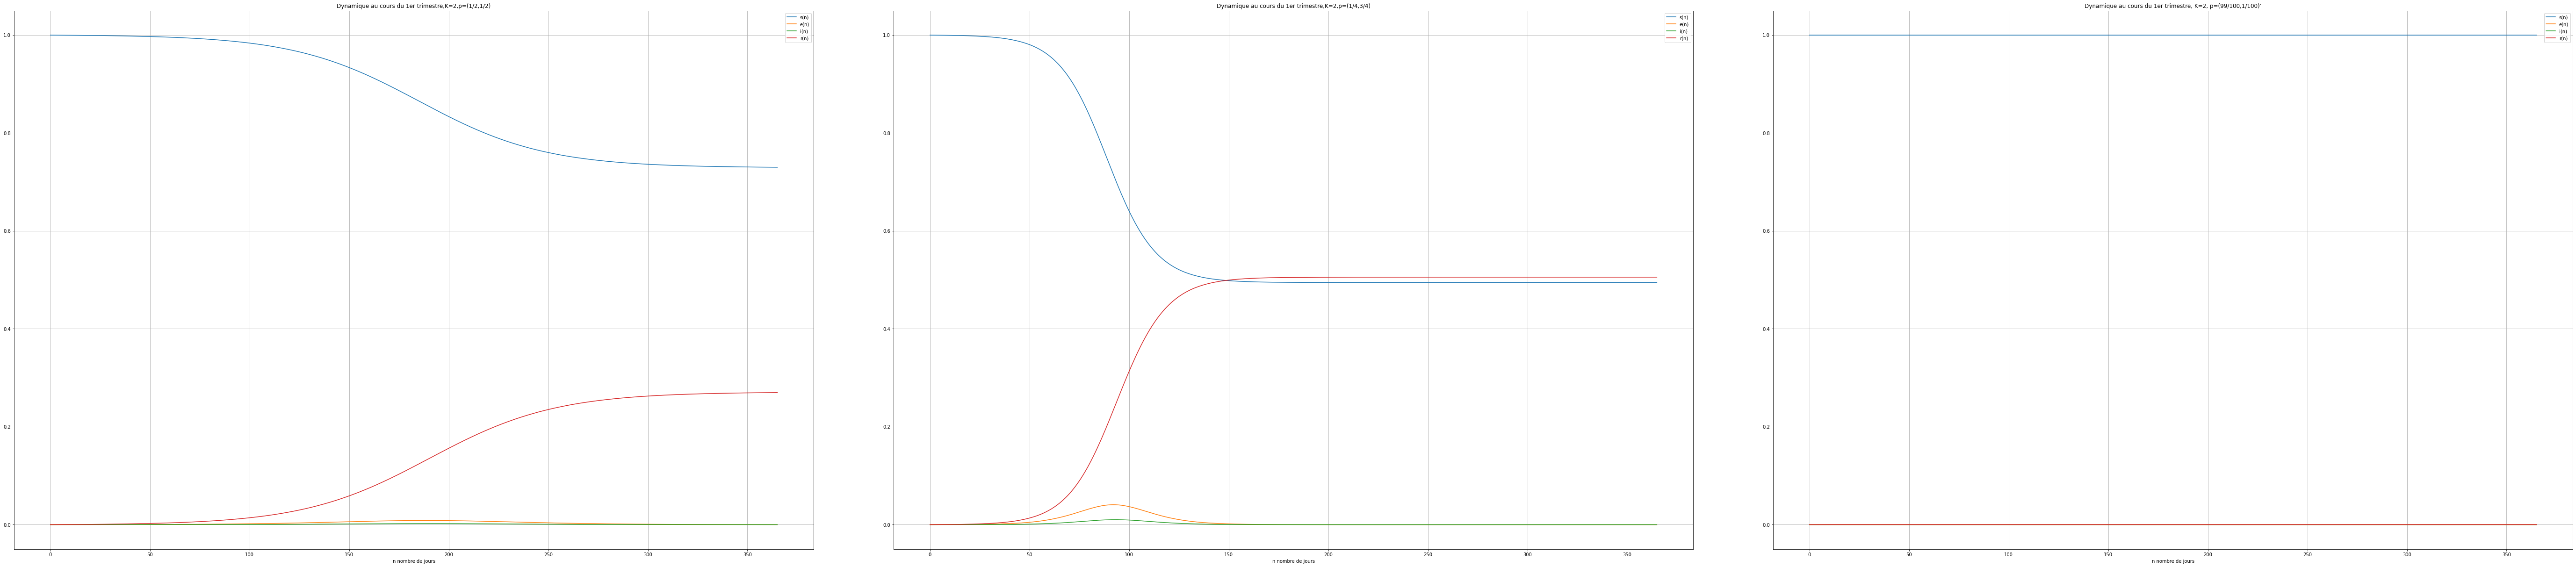

In [27]:
X01=hstack((0.99984*array([1/2,1/2]),array([8.81*10**(-5),1.88*10**(-5),5.35*10**(-5)]))) #cas p1=p2
X02=hstack((0.99984*array([1/4,3/4]),array([8.81*10**(-5),1.88*10**(-5),5.35*10**(-5)]))) #cas p1=(1-p2)=1/4
X03=hstack((0.99984*array([1/100,99/100]),array([8.81*10**(-5),1.88*10**(-5),5.35*10**(-5)]))) #cas p1=(1-p2)=3/4

beta1=2.33*array([1/2,1/2])
beta2=2.33*array([1/4,3/4])
beta3=2.33*array([99/100,1/100])

#test cas K=2, beta differents

covid1=EE_K(n=365,T=365,df=dseir_K,X0=X01,beta=beta1,alpha=0.25,gamma=1.0)
covid2=EE_K(n=365,T=365,df=dseir_K,X0=X02,beta=beta2,alpha=0.25,gamma=1.0)
covid3=EE_K(n=365,T=365,df=dseir_K,X0=X03,beta=beta3,alpha=0.25,gamma=1.0)

#n=365
figure()
pyplot.gcf().subplots_adjust(left = 0.2, bottom = 1, right = 4, top = 3, wspace = 0.1, hspace = 1)

subplot(1,3,1)
plot(range(366),covid1[:,0]+covid1[:,1])
plot(range(366),covid1[:,2:])
legend(['s(n)','e(n)','i(n)','r(n)'])
title("Dynamique au cours du 1er trimestre,K=2,p=(1/2,1/2)")
xlabel('n nombre de jours')
grid(True)

subplot(1,3,2)
plot(range(366),covid2[:,0]+covid2[:,1])
plot(range(366),covid2[:,2:])
legend(['s(n)','e(n)','i(n)','r(n)'])
title("Dynamique au cours du 1er trimestre,K=2,p=(1/4,3/4)")
xlabel('n nombre de jours')
grid(True)

subplot(1,3,3)
plot(range(366),covid3[:,0]+covid3[:,1])
plot(range(366),covid3[:,2:])
legend(['s(n)','e(n)','i(n)','r(n)'])
title("Dynamique au cours du 1er trimestre, K=2, p=(99/100,1/100)'")
xlabel('n nombre de jours')
grid(True)

Nous pouvons conjecturer les choses suivantes pour la suite :

- La valeur min de $\zeta$ les atteinte dans le cas 3, c'est à dire lorsqu'il y a peu d'individus dans la classe 2 (où le beta-taux d'exposition est grand).

- La valeur min du pic $\pi$ est atteinte dans le cas 3- dans les mêmes circonstances donc.

- A propos du temps d'atteinte du pic tp, si on veut le retardre le cas 3 semble encore indiqué; en revanche si on veut le faire survenir le plus tôt possible (pour limiter l'impact économique du confinement par exemple) c'est la cas 2 avec beaucoup d'individus dans la classe exposée à choisir.

Ces hypothèses logiques sur la manière de gérer une pandémie semble rationnelle et on est content que notre modèle vérifie ces propriétés.

## Cas général

On va supposer maintenant $K>1$:

- Les $\beta_{k}$ ne seront plus constants mais répartis dans $[\beta/10,10\beta]$ avec la contrainte que $\sum p_k\beta_{k}=\beta$

- Les $s_{k}(0)$ ne sont plus constants ie $\forall k \in \{1,\dots,K\},s_{k}(0):=s(0)p_{k}$ avec $0\le p_{k}\le1$ et $\sum_{k}p_{k}=1$

On posera $p:=(p_{1},\dots,p_{K})\in C$, C êtant défini comme $C:=\{(p_{1},\dots,p_{K})\in [0,1]^{K}, \sum_{k=1}^{K}p_{k}=1,\sum_k p_k\beta_{k}=\beta\}$.

Dans ce contexte, en supposant qu'on puisse faire varier les $p_{k}$ plusieurs problèmes d'optimisation sont intéressants: (On pourra noter par la suite f(t,p) plutôt que f(t) pour f fonction pour marquer la dépendance du système à p).

(1) Minimiser $\zeta$ ie résoudre $min_{p}\{lim_{T \to \infty} R(T,p),p\in C\}%=lim_{T \to \infty}min_{p}\{ R(T,p),p\in C\}$ 

(2) Minimiser le pic $\pi$ ie résoudre $min_{p}\{max_{t}\{E(t,p)+I(t,p),t\in [0,T],p\in C\}\}%=max_{t}\{min_{p}\{E(t,p)+I(t,p),t\in [0,T],p\in C\}\}$ 

(3) Minimiser le temps d'atteinte du pic $t_{p}$ ie résoudre $min_{p}\{argmax_{t}\{E(t,p)+I(t,p),t \in [0,T],p\in C\}\}=min_{p}\{E(t,p)+I(t,p),t \in [0,T],p\in C, \frac{de}{dt}(t,p)+\frac{di}{dt}(t,p)=0\}$

(4) Maximiser le temps d'atteinte du pic $t_{p}$ ie résoudre $max_{p}\{argmax_{t}\{E(t,p)+I(t,p),t \in [0,T],p\in C\}\}=max_{p}\{E(t,p)+I(t,p),t \in [0,T],p\in C, \frac{de}{dt}(t,p)+\frac{di}{dt}(t,p)=0\}$

Les égalités (1)-(4) ne sont pas triviales du tout mais comme nous n'avons pas accès à la définition explicite de (s,e,i,r)(t) on peut toujours la supposer aussi régulière que nécessaire. La forme des contraintes proposées sur t et p sont finalement des compacts ce qui nous garantit l'existence des extrema recherchés.

### Optimisation stochastique de $\pi$

Nous choisissons le problème (2): En d'autres termes;

$min_{p}\{max_{t}\{E(t,p)+I(t,p),t\in [0,T],p\in C\}\}$

Pour résoudre ce problème:

**Stratégie (1)**

(1) On simule $(E+I)(t_n,p)$ pour $t_n \in [0,T]$ avec T suffisamment grand et on obtient ainsi $(E+I)(t_n(p)):=max_{t_n}(E+I)(t_n,p)$

(2) On résoud $min_p (E+I)(t_n(p))$ sous la contrainte $p \in C$ via l'algorithme 'differential evolution' voir: https://en.wikipedia.org/wiki/Differential_evolution

Cette stratégie a néanmoins comme problèmes importants:

- $t_n$ ne prend qu'un nombre fini de valeurs; dans le cas de résolutions approchées d'EDO c'est toujours le cas mais ceci dit sans adapter le pas il est difficile de garantir qu'on ait un maximum.

- Differential_evolution a une convergence lente... quand K devient grand il devient difficile d'optimiser en temps fini...

**Stratégie (2)**

(1') Plutôt que de trouver $(e+i)(t_n(p))$ avec $t_n(p)$ parmi un nombre fini de valeurs on peut utiliser un algorithme déterministe d'optimisation en utilisant comme fonction objectif la fonction black-box odeint() qui devrait donner une approximation convenable de $(e+i)(t)$ pour tout t et utiliser le système d'EDO comme version évaluable du gradient.

- Cependant on s'expose en utilisant un nouvel algorithme d'optimisation à des temps de calculs longs...

- On peut bloquer sur un point selle.

**Stratégie (3)**

(2') On remplace l'algorithme d'optimisation stochastique par un algorithme déterministe où l'on résoudrait; avec la même technique que dans la stratégie 2.

- Mais comme rien ne garantit l'uncité du point de maximum t(p); on ne peut plus garantir que la sortie n'est pas un minimum local de (e+i)(t(p),p).


In [0]:
from scipy import optimize as s_o
import time as time

### Creation de l'objet d'optimisation

In [0]:
###Test de l'algo differential evolution

def constr_f(x):
    return np.array(x[0] + x[1]) # the sum of x[0] and x[1] must be less than 1.9 
nlc = s_o.NonlinearConstraint(constr_f, -inf, 1.9) # specify limits using a Bounds object. 
bounds = s_o.Bounds([0., 1.], [2., 2.]) 
print(bounds)
result = s_o.differential_evolution(s_o.rosen, bounds, constraints=(nlc)) 
print(result)

Bounds([0.0, 1.0], [2.0, 2.0])
           constr: [array([0.])]
 constr_violation: 0.0
              fun: 3.6275513535216626
            maxcv: 0.0
          message: 'Optimization terminated successfully.'
             nfev: 488
              nit: 36
          success: True
                x: array([0.89992052, 1.00005513])


/usr/local/lib/python3.6/dist-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


In [38]:
s_o.minimize(method='BFGS',x0=1,fun=lambda x:x**2,jac=lambda x:2*x)

      fun: 0.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([0.])

In [0]:

class pi(object):

#####################################
####Initialisation des constantes####
#####################################

    alpha=0.25
    gamma=1.0
    K=100
    beta=2.33*linspace(1/10,10,100)
    s0=0.99984
    e0=8.81*10**(-5)
    i0=1.88*10**(-5)
    r0=5.35*10**(-5)
    T=365
    
    #Constructeur
    
    def __init__(self,K,T):
        
        self.K=K
        self.beta=2.33*linspace(1/10,10,K)
        print('les beta sont entre:',min(self.beta),max(self.beta))
        self.T=T
        
#################################
#########Fonction objectif#######
#################################
    
#Ces fonctions renvoient max((e+i)(t))

    #version max discretise
    def eplusi_n(self,p):#p=(p,,...pK); T horizon de temps
        
        sk0=self.s0*p #s1(0)...sK(0)
        X0=hstack((sk0,array([self.e0,self.i0,self.r0])))

        seir_tp=odeint(dseir_K,X0,range(self.T),args=(self.K,self.beta,self.alpha,self.gamma))#solution a n points

        opt=max(seir_tp[:,self.K]+seir_tp[:,self.K+1])
        return opt

    #version max 
    def eplusi(self,p):

      sk0=self.s0*p #s1(0)...sK(0)
      X0=hstack((sk0,array([self.e0,self.i0,self.r0])))

      def f(t): #-(e+i)(t)
        tmp=odeint(dseir_K,X0,[0,t],args=(self.K,self.beta,self.alpha,self.gamma)) #evaluation de (s,e,i,r)(t)
        return (-1*array(tmp[1][self.K]+tmp[1][self.K+1]) )

      def Df(t) : #-(de+di)/dt(t)

        X=odeint(dseir_K,X0,[0,t],args=(self.K,self.beta,self.alpha,self.gamma))[:][1] #evaluation de (s,e,i,r)(t)
        #print(X)
        tmp=dseir_K(X=X,t=t,beta=self.beta,K=self.K,alpha=self.alpha,gamma=self.gamma) #evaluation de d(s,e,i,r)/dt(t)
        #print(tmp)

        return array([-1*(tmp[self.K]+tmp[self.K+1])])

      opt=s_o.minimize(fun=f,x0=0.,jac=Df)


      return  (-opt.fun)#methode par default bfgs; rq: a priori t pourrait partir dans le negatif...


    
###########################
######Optimisation##########
###########################

#Cette fonction renvoie le min_p(max_t((e+i)(t(p))))

#methode: 1-1 pour strategie 1-2; 1-2 pour strategie 1-2'; 2-1 pour strategie 1'-1 ect.
#verbosity pour rendre la fonction bavarde

    def optimize(self,method=[1,1],verbosity=True): #ne changer max_workers que si machine virtuelle
        
        if(verbosity):
          print(">>>>>>>>>>>>Optimizing>>>>>>>>>>>>>")
          start_time = time.time()#mesure du temps d'execution
        
        if(method[0]==1):g=self.eplusi_n
        else:g=self.eplusi
        
        ##########Contraintes##########
        
        #bornes sur les pk
        tmp=[0.,1.]
        bounds=array([tmp for k in range(self.K)])
        #la somme a 1 
        nlc1=s_o.NonlinearConstraint(lambda p:sum(p),1.,1.)
        #moyenne des beta a 2.33
        nlc2=s_o.NonlinearConstraint(lambda p:dot(p,self.beta),2.33,2.33)
        
        ##########Optimisation##########
        
        if method[1]==1:result=s_o.differential_evolution(g, bounds=bounds,constraints=(nlc1,nlc2)) 

        else: 
          if(self.K>1):X0=hstack((array([1/10]),9/(10*(self.K-1))*ones(self.K-1)))
          else:X0=1
          result=s_o.minimize(g,x0=X0,bounds=bounds,constraints=(nlc1,nlc2)) #encore 1 fois la methode par default est bfgs; ici la jacobienne/hessienne utilisees sont evaluees par differences finies
        
        if(verbosity):
          print("<<<<<<<<<<<<<Optimizing<<<<<<<<<<<<")
          print('time ellapsed:',"--- %s seconds ---" % (time.time() - start_time))
        
        return(result)



### Tests pour K=2

In [169]:
#Test pour K=2

test=pi(2,90)

print('-----------------------Methode 1----------------')
results_test=test.optimize()

print("p otimal:",results_test.x)
print("beta associe",test.beta)

print('-----------------------Methode 2----------------')
results_test=test.optimize(method=[2,1])

print("p otimal:",results_test.x)
print("beta associe",test.beta)

print('-----------------------Methode 3----------------')
results_test=test.optimize(method=[2,2])

print("p otimal:",results_test.x)
print("beta associe",test.beta)

les beta sont entre: 0.233 23.3
-----------------------Methode 1----------------
>>>>>>>>>>>>Optimizing>>>>>>>>>>>>>


/usr/local/lib/python3.6/dist-packages/scipy/optimize/_differentialevolution.py:812: UserWarning: differential evolution didn't find a solution satisfying the constraints, attempting to polish from the least infeasible solution
  " infeasible solution", UserWarning)


<<<<<<<<<<<<<Optimizing<<<<<<<<<<<<
time ellapsed: --- 5.964200019836426 seconds ---
p otimal: [0.90909091 0.09090909]
beta associe [ 0.233 23.3  ]
-----------------------Methode 2----------------
>>>>>>>>>>>>Optimizing>>>>>>>>>>>>>
<<<<<<<<<<<<<Optimizing<<<<<<<<<<<<
time ellapsed: --- 5.953585624694824 seconds ---
p otimal: [0.90909091 0.09090909]
beta associe [ 0.233 23.3  ]
-----------------------Methode 3----------------
>>>>>>>>>>>>Optimizing>>>>>>>>>>>>>
<<<<<<<<<<<<<Optimizing<<<<<<<<<<<<
time ellapsed: --- 0.5152690410614014 seconds ---
p otimal: [0.90909091 0.09090909]
beta associe [ 0.233 23.3  ]


In [59]:
Xtest=hstack((0.99984*array(results_test.x),array([8.81*10**(-5),1.88*10**(-5),5.35*10**(-5)])))
print("le X0:",Xtest)
covid_test=EE_K(n=365,T=365,df=dseir_K,X0=Xtest,beta=test.beta,alpha=0.25,gamma=1.0)

le X0: [9.08945455e-01 9.08945455e-02 8.81000000e-05 1.88000000e-05
 5.35000000e-05]


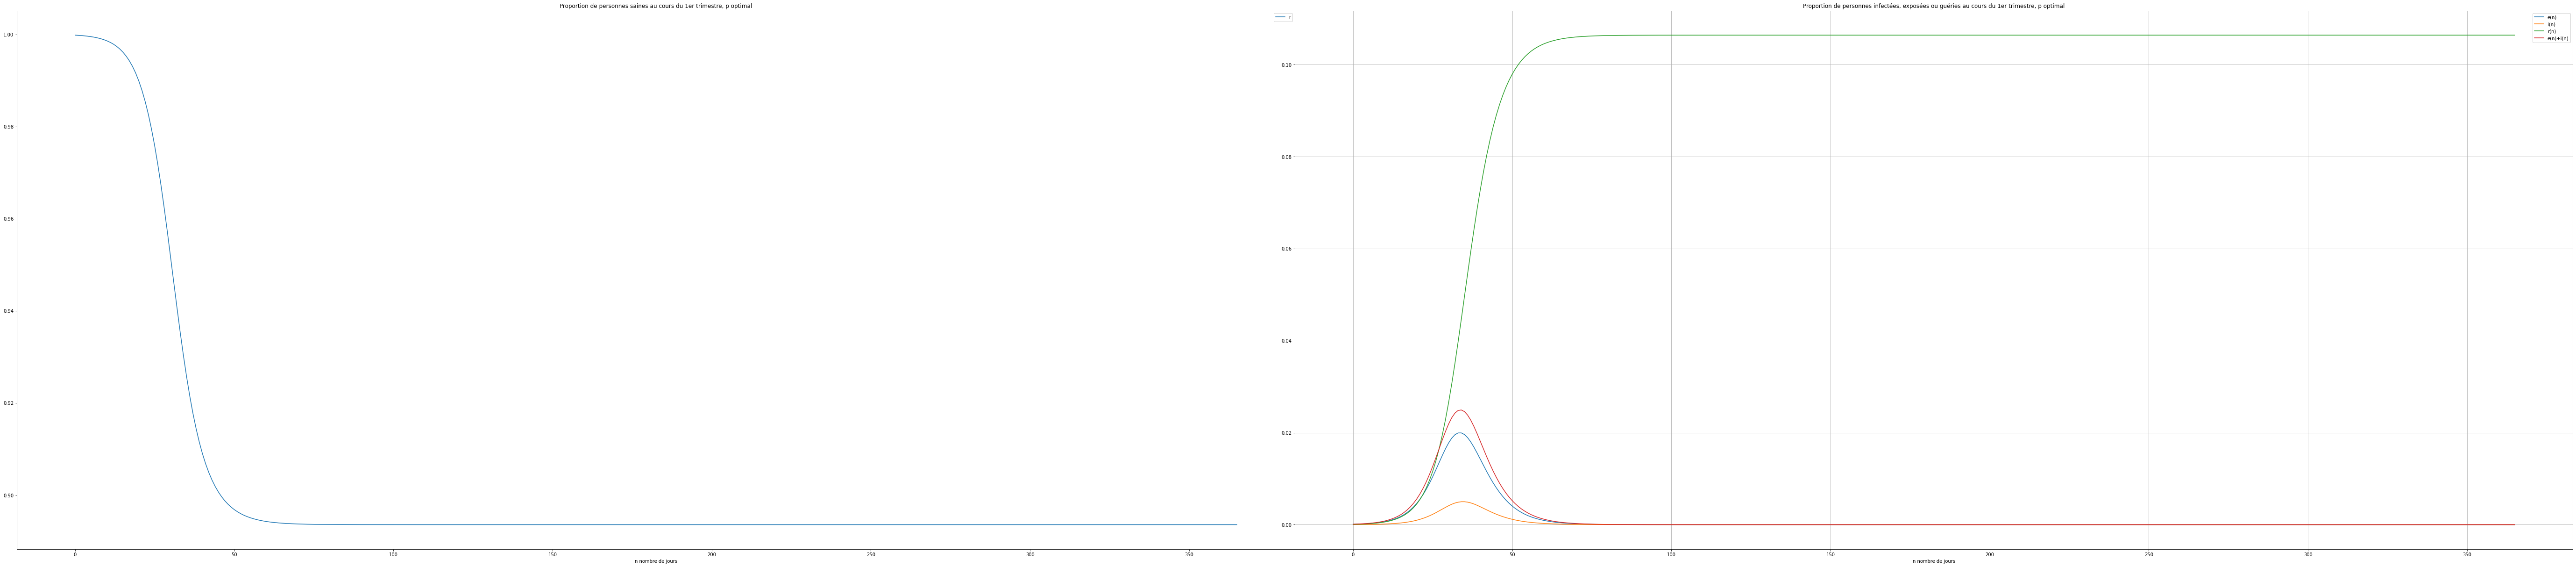

In [60]:
#Dynamique

figure()
pyplot.gcf().subplots_adjust(left = 0.2, bottom = 1, right = 4, top = 3, wspace = 0, hspace = 1)
subplot(121)
plot(range(366),(covid_test[:,0]+covid_test[:,1]))
legend('r(n)')
xlabel('n nombre de jours')
title('Proportion de personnes saines au cours du 1er trimestre, p optimal')
subplot(122)
plot(range(366),covid_test[:,2:])
plot(range(366),covid_test[:,2]+covid_test[:,3])
legend(['e(n)','i(n)','r(n)','e(n)+i(n)'])
xlabel('n nombre de jours')
title('Proportion de personnes infectées, exposées ou guéries au cours du 1er trimestre, p optimal')
grid(True)

Avec le p optimal le pic est atteint pour une valeur de 0.025 alors qu'avec K=1 on était de l'ordre de 0.22 (on a gagné un facteur 10 à peu près).


### Résultats pour $K=10$

**Benchmarking**:

In [174]:
pi10=pi(10,90)#Creation de l'objet
print("---------------Methode 1,2----------")
print(pi10.optimize([1,1]).fun) 
print("---------------Methode 1',2---------")
print(pi10.optimize([2,1]).fun)
print("---------------Methode 1,2'---------")
print(pi10.optimize([1,2]).fun)
print("---------------Methode 1',2'---------")
print(pi10.optimize([2,2]).fun)

les beta sont entre: 0.233 23.3
---------------Methode 1,2----------
>>>>>>>>>>>>Optimizing>>>>>>>>>>>>>


/usr/local/lib/python3.6/dist-packages/scipy/optimize/_differentialevolution.py:812: UserWarning: differential evolution didn't find a solution satisfying the constraints, attempting to polish from the least infeasible solution
  " infeasible solution", UserWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


<<<<<<<<<<<<<Optimizing<<<<<<<<<<<<
time ellapsed: --- 24.608871698379517 seconds ---
0.023741192879874577
---------------Methode 1',2---------
>>>>>>>>>>>>Optimizing>>>>>>>>>>>>>
<<<<<<<<<<<<<Optimizing<<<<<<<<<<<<
time ellapsed: --- 30.174992561340332 seconds ---
0.023760034314500824
---------------Methode 1,2'---------
>>>>>>>>>>>>Optimizing>>>>>>>>>>>>>
<<<<<<<<<<<<<Optimizing<<<<<<<<<<<<
time ellapsed: --- 0.3806154727935791 seconds ---
0.023684333514673958
---------------Methode 1',2'---------
>>>>>>>>>>>>Optimizing>>>>>>>>>>>>>
<<<<<<<<<<<<<Optimizing<<<<<<<<<<<<
time ellapsed: --- 2.029477834701538 seconds ---
0.023692377258495097


Le minimum trouvé est le même (à quelques décimales près): Les algorithmes déterministes ont donc bien convergé vers un minimum global. Le fait qu'on utilise un algorithme déterministe (BFGS) avec une bonne initialisation a largement amélioré les temps de calcul tout en fonctionnant correctement! La méthode 1-2' ie t(p) pris parmi un nombre fini de valeurs, p minimisant t(p) déterminé par BFGS est finalement le plus performant!

In [175]:
results10=pi10.optimize([1,2])

>>>>>>>>>>>>Optimizing>>>>>>>>>>>>>
<<<<<<<<<<<<<Optimizing<<<<<<<<<<<<
time ellapsed: --- 0.36269474029541016 seconds ---


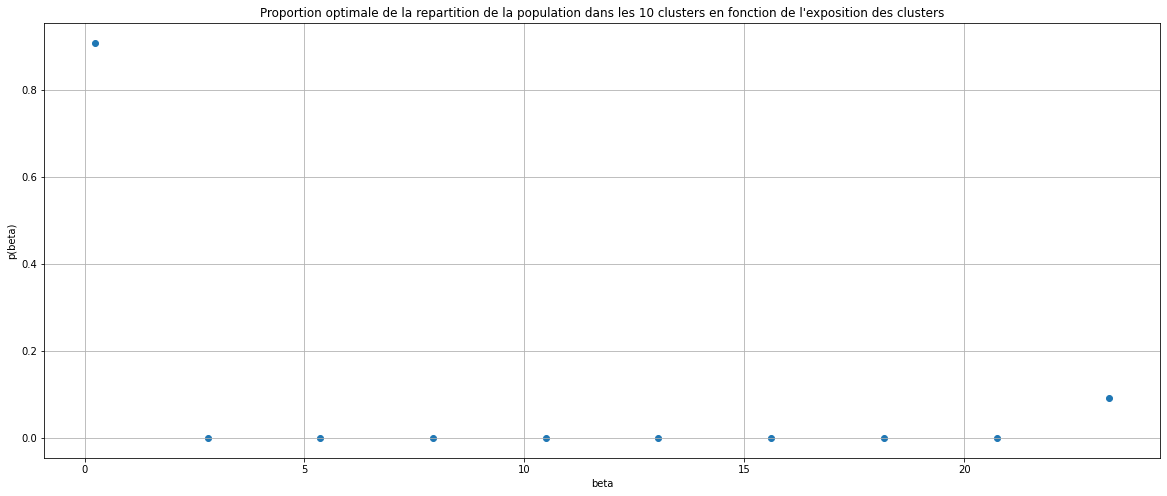

In [176]:
#Graphe de p(beta)

figure()
scatter(pi10.beta,results10.x)
title("Proportion optimale de la repartition de la population dans les 10 clusters en fonction de l'exposition des clusters")
xlabel('beta')
ylabel('p(beta)')
grid(True)

In [178]:
#Dynamique cas p optimal
X0=hstack((0.99984*results10.x,array([8.81*10**(-5),1.88*10**(-5),5.35*10**(-5)])))
print('Verification CI:',X0)
covid10_ee=EE_K(n=365,T=365,df=dseir_K,X0=X0,beta=pi10.beta,alpha=0.25,gamma=1.0)
K=10

Verification CI: [9.08945454e-01 0.00000000e+00 0.00000000e+00 3.46889184e-17
 0.00000000e+00 5.20333776e-18 0.00000000e+00 6.93778368e-18
 0.00000000e+00 9.08945456e-02 8.81000000e-05 1.88000000e-05
 5.35000000e-05]


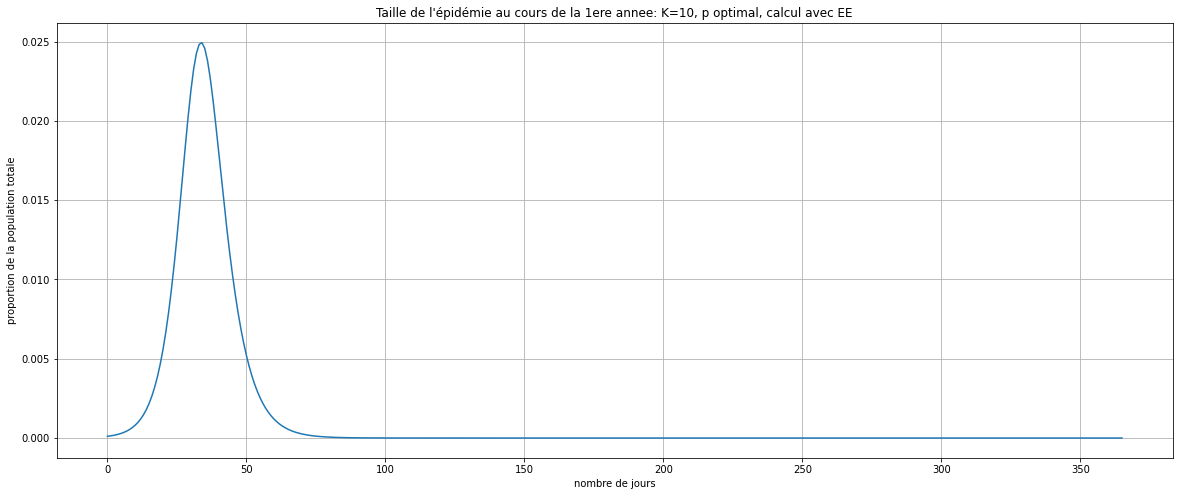

In [179]:
figure()
plot(range(366),covid10_ee[:,K]+covid10_ee[:,K+1])
title("Taille de l'épidémie au cours de la 1ere annee: K=10, p optimal, calcul avec EE")
xlabel('nombre de jours')
ylabel('proportion de la population totale')
grid(True)

La taille du pic ainsi que la durée de l'épidémie sont en fait semblables au cas K=2: on n'a pas gagné beaucoup de performances en augmentant K!

L'algorithme d'optimisation considère avoir échoué car il a atteint sa bormne de convergence sans respecter les contraintes mais l'écart de l'ordre de 10-6 par rapport aux bornes fixées des contraites est probablement moins importante que l'erreur numérique d'intégration du système.

Enfin, il semble que la stratégie d'optimisation soit de metre une forte proportion de gens dans la classe la moins exposée (beta petit) et le reste dans la classe la plus exposée (cela est un peu surprenant). Mais du coup l'augmentation de la dimension ne change pas la valeur du pic...


### Résultats pour $K=100$

In [181]:
pi100=pi(100,90)#Creation de l'objet
results100=pi100.optimize([1,2]) #Optimisation stochastique avec t a valeurs discretes
print(results100.message)

les beta sont entre: 0.233 23.3
>>>>>>>>>>>>Optimizing>>>>>>>>>>>>>
<<<<<<<<<<<<<Optimizing<<<<<<<<<<<<
time ellapsed: --- 12.78523564338684 seconds ---
Optimization terminated successfully.


In [182]:
print('Somme des pk: ',sum(results100.x))
print('Moyenne des betak: ',dot(pi100.beta,results100.x))

Somme des pk:  1.0000000000000013
Moyenne des betak:  2.3299999962306366


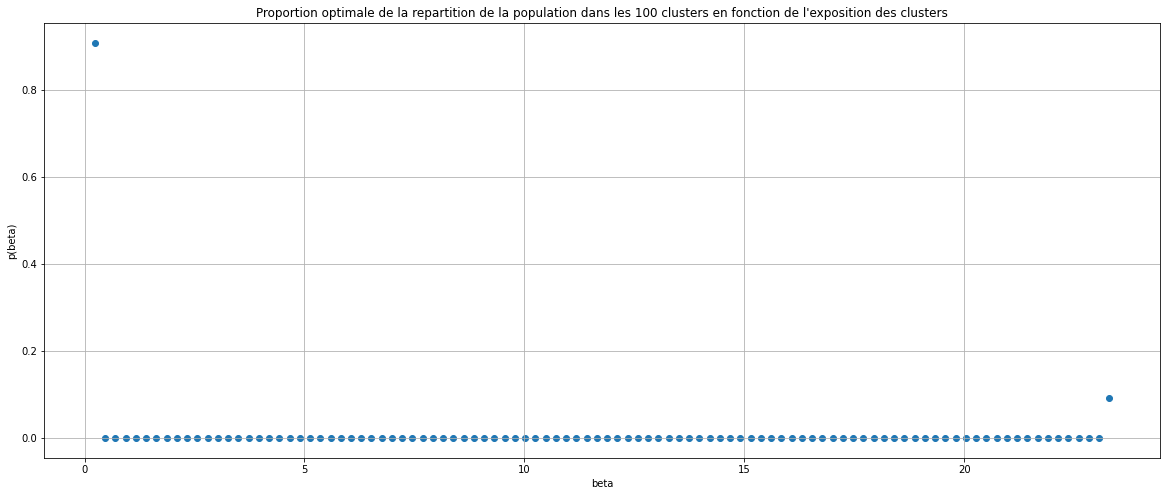

In [183]:
figure()
scatter(pi100.beta,results100.x)
title("Proportion optimale de la repartition de la population dans les 100 clusters en fonction de l'exposition des clusters")
xlabel('beta')
ylabel('p(beta)')
grid(True)

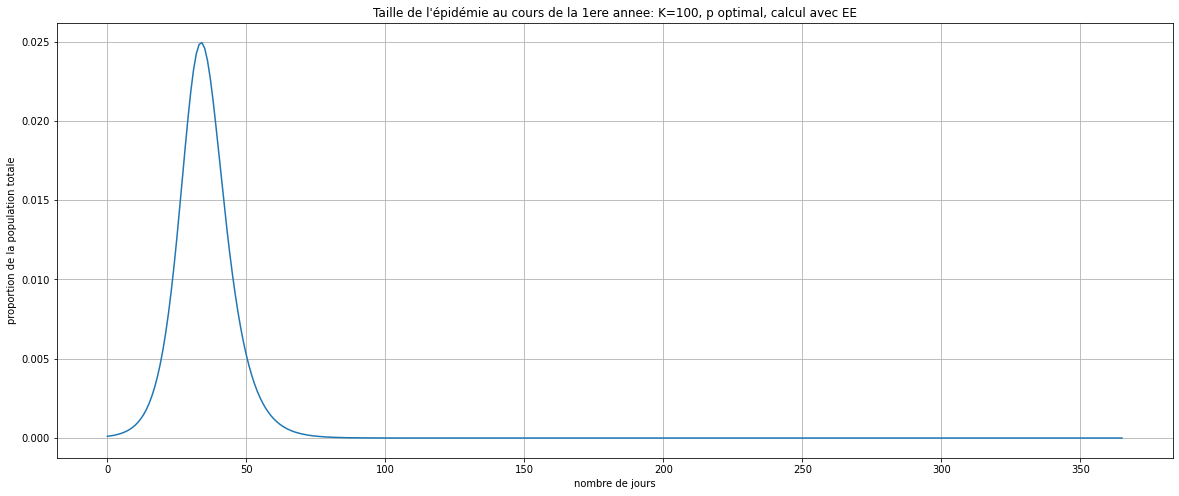

In [184]:
#Dynamique cas p optimal
X0=hstack((0.99984*results100.x,array([8.81*10**(-5),1.88*10**(-5),5.35*10**(-5)])))
covid100_ee=EE_K(n=365,T=365,df=dseir_K,X0=X0,beta=pi100.beta,alpha=0.25,gamma=1.0)
K=100

figure()
plot(range(366),covid100_ee[:,K]+covid100_ee[:,K+1])
title("Taille de l'épidémie au cours de la 1ere annee: K=100, p optimal, calcul avec EE")
xlabel('nombre de jours')
ylabel('proportion de la population totale')
grid(True)

### Résultats pour $K=1000$

Ne pas éxécuter sous peine de devoir redémarrer le kernel (calculs longs!)

In [0]:
pi1000=pi(1000,90)#Creation de l'objet
results1000=pi1000.optimize([1,2]) #Optimisation
print(results1000.message)

les beta sont entre: 0.233 23.3
>>>>>>>>>>>>Optimizing>>>>>>>>>>>>>


### Conclusions

Il semble que la stratégie d'optimisation efficiente consiste à charger la classe avec le plus petit $\beta_k$ en y mettant 9/10 des individus et en mettant le reste de la population dans une autre classe (ou uniformément parmi les autres classes). Dès lors le problème est peu sensible à la dimension c'est à dire que les résultats sont les mêmes pour K=2 que pour K>2. Pour tester le cas K=1000 une solution serait de passer un vecteur $(1/10,\frac{9}{10K},\dots)$ comme point de départ pour l'algorithme d'optimisation pour accélerer la convergence.